# EXERCISE 7.2

Alla simulazione precedente viene richiesto di includere il calcolo della funzione di distribuzione radiale $g(r)$ in funzione della distanza (espressa in unità ridotte) tra le particelle stesse.
$$g_N^n(r_1,...,r_n)=\frac{\rho_N^n(r_1,...,r_N)}{\prod_{i=1}^n\rho_N^{(1)}(r_i)}$$

Questa distribuzione descrive come varia la densità di materia in funzione della distanza da un punto assegnato---> anche se non è una probabilità, si può vedere come effettivamente la probabilità di trovare due particelle a distanza r. 

La procedura per calcolare $g(r)$ computazionalmente è:
1) Divisione del lato del volume in cui compio la simulazione (box) in 100 bin, che rappresenteranno le distanze che una coppia di particelle può avere durante la simulazione

2) Calcolare la distanza $\delta(r_i-r_j)$ tra due particelle consecutive e vedere in quale bin ricade. Quello che sto facendo è riempire "idealmente" un istogramma, incrementando di volta in volta i bin di 2

3) Calcolare g(r) come $$g(r)=\frac{1}{\rho N \Delta V(r)}\langle\sum_i\sum_{j=1}^N \delta(r_i-r_j)\rangle$$ con $\Delta V(r)=\frac{4\pi}{3}((r+dr)^3-r^3)$ volume della corona sferica 


Il valore medio di $g(r)$ è stato calcolato sia per ogni blocco (file "output.gofr.0") sia è stata calcolata la media finale con le relative incertezze portate dalla media a blocchi (file "output.gave.0").
Riporto il grafico dell'andamento di $g(r)$ per il gas con le relative incertezze.

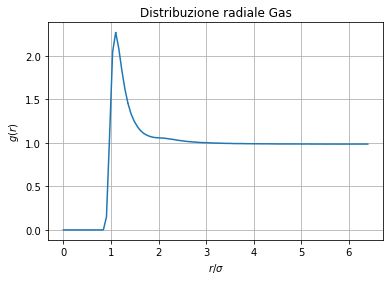

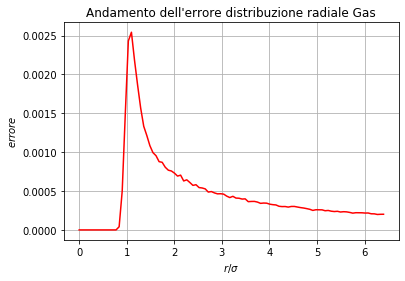

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

Gr_gas=np.loadtxt("output.gave.0",max_rows=100)
Gr_liq=np.loadtxt("output.gave.0",skiprows=100,max_rows=100)
Gr_sol=np.loadtxt("output.gave.0",skiprows=200)

#GAS
plt.errorbar(Gr_gas[:,0],Gr_gas[:,1],Gr_gas[:,2])
plt.xlabel("$r/\sigma$")
plt.ylabel("$g(r)$")
plt.title("Distribuzione radiale Gas")
plt.grid(True)
plt.show()

plt.plot(Gr_gas[:,0],Gr_gas[:,2],"-r")
plt.xlabel("$r/\sigma$")
plt.ylabel("$errore$")
plt.title("Andamento dell'errore distribuzione radiale Gas")
plt.grid(True)
plt.show()



Essendo l'errore associato così piccolo da far sì che le barre d'errore siano praticamente invisibili ho plottato anche l'andamento dell'errore da solo. 
Per le simulazioni del liquido e del solido pertanto le ho tralasciate, avendo riscontrato lo stesso comportamento.


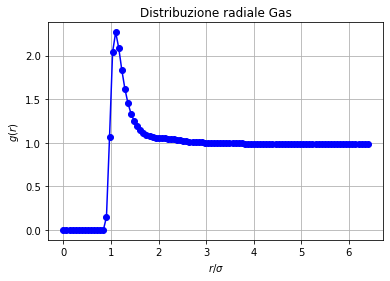

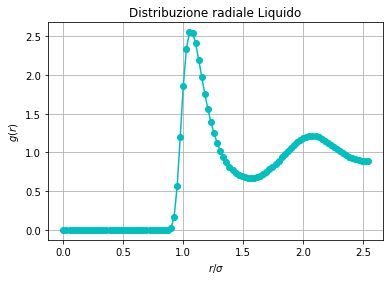

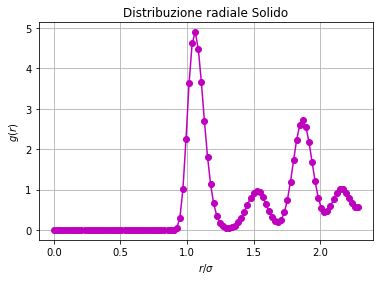

In [16]:
#GAS
plt.plot(Gr_gas[:,0],Gr_gas[:,1],"-bo")
plt.xlabel("$r/\sigma$")
plt.ylabel("$g(r)$")
plt.title("Distribuzione radiale Gas")
plt.grid(True)
plt.show()

#LIQUIDO
plt.plot(Gr_liq[:,0],Gr_liq[:,1],"-co")
plt.xlabel("$r/\sigma$")
plt.ylabel("$g(r)$")
plt.title("Distribuzione radiale Liquido")
plt.grid(True)
plt.show()

#SOLIDO
plt.plot(Gr_sol[:,0],Gr_sol[:,1],"-mo")
plt.xlabel("$r/\sigma$")
plt.ylabel("$g(r)$")
plt.title("Distribuzione radiale Solido")
plt.grid(True)
plt.show()

Sia il gas, il liquido e il solido hanno probabilità nulla di trovarsi a una distanza minore di una $r*$ in quanto le forze repulsive superano quelle attrattive.
Mentre però il gas ( a parte il picco iniziale) mostra stessa probabilita per gli $r>r*$, il solido e il liquido, essendo maggiormente vincolati, mostrano un comportamento a bande.